In [18]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SVC for classification through support vector machine
from sklearn.svm import SVC

# importing train test split & GridSearchCV library
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# standardization library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# pipelline libraray
from sklearn.pipeline import Pipeline

# figure parameters
sns.set_theme(style='darkgrid', palette='Set1')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 200

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('SalaryData_Train(1).csv')

In [3]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df.duplicated().sum()

3258

In [9]:
df.drop_duplicates(keep = 'first', inplace = True)

In [10]:
df.duplicated().sum()

0

<Axes: >

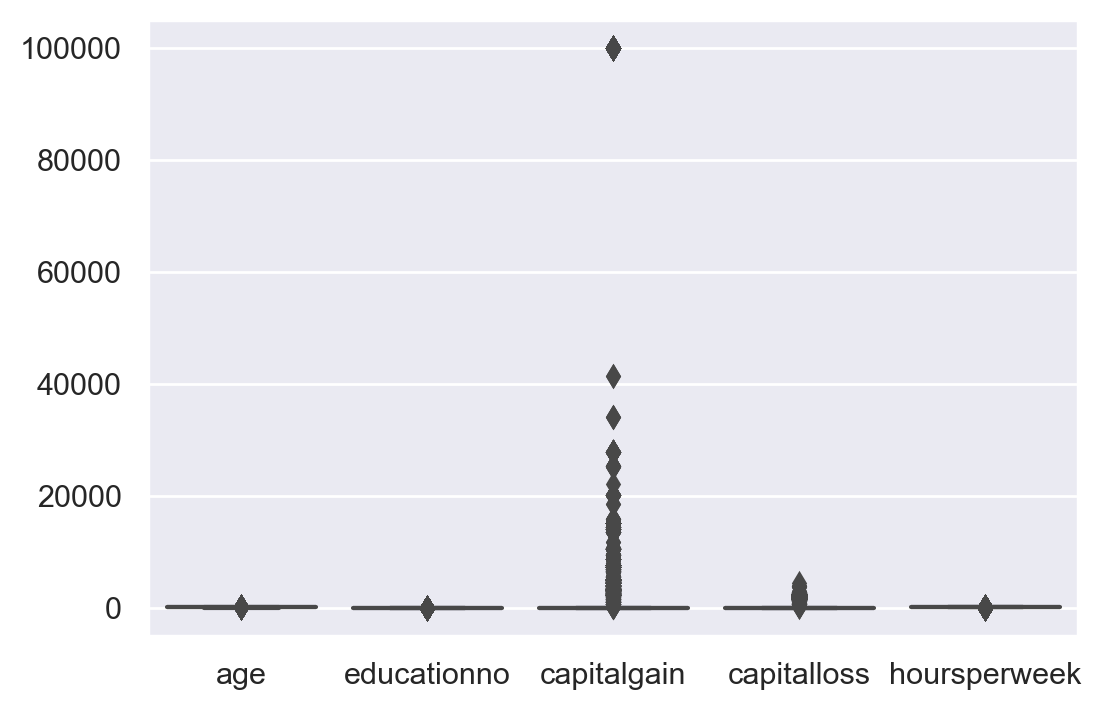

In [11]:
sns.boxplot(df)

Text(0.5, 1.0, 'Zoomed in Boxplot')

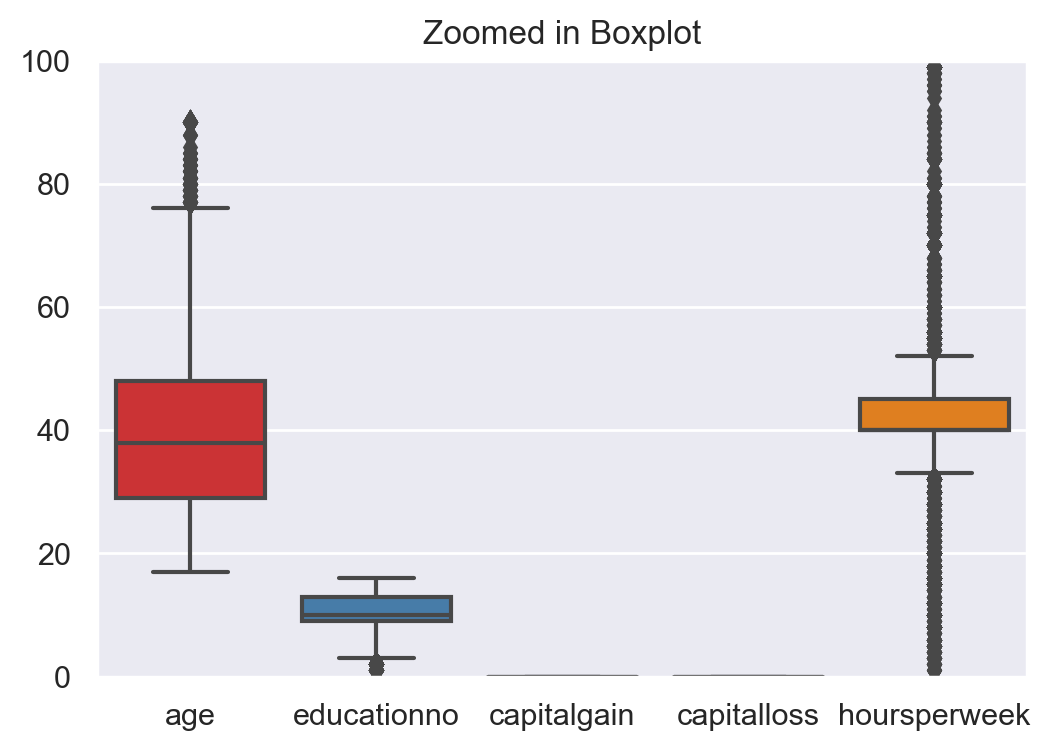

In [19]:
sns.boxplot(df)
plt.ylim(0,100)
plt.title('Zoomed in Boxplot')

In [26]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    
    df.loc[df[col]>upper,col] = upper
    df.loc[df[col]<lower,col] = lower

In [27]:
remove_outlier(df = df, col='age')
remove_outlier(df = df, col='educationno')
remove_outlier(df = df, col='capitalgain')
remove_outlier(df = df, col='capitalloss')
remove_outlier(df = df, col='hoursperweek')

<Axes: >

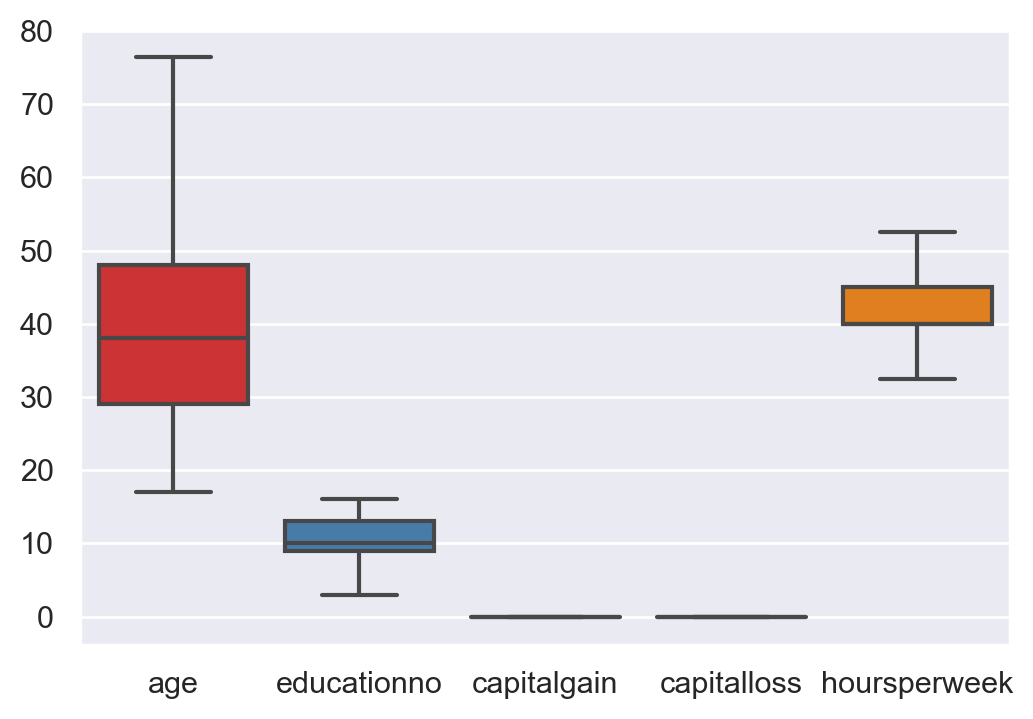

In [28]:
sns.boxplot(df)

In [29]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [30]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

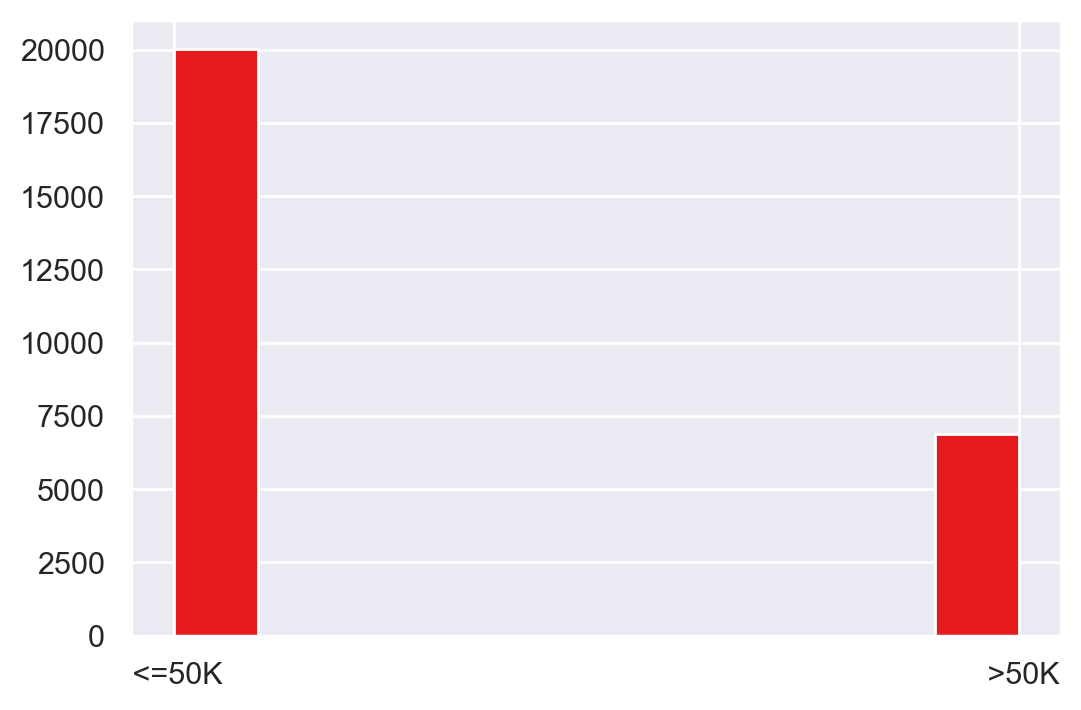

In [34]:
plt.hist(df['Salary'])
plt.show()

In [41]:
high_sal = df[df['Salary'] == ' >50K']
low_sal = df[df['Salary'] == ' <=50K']

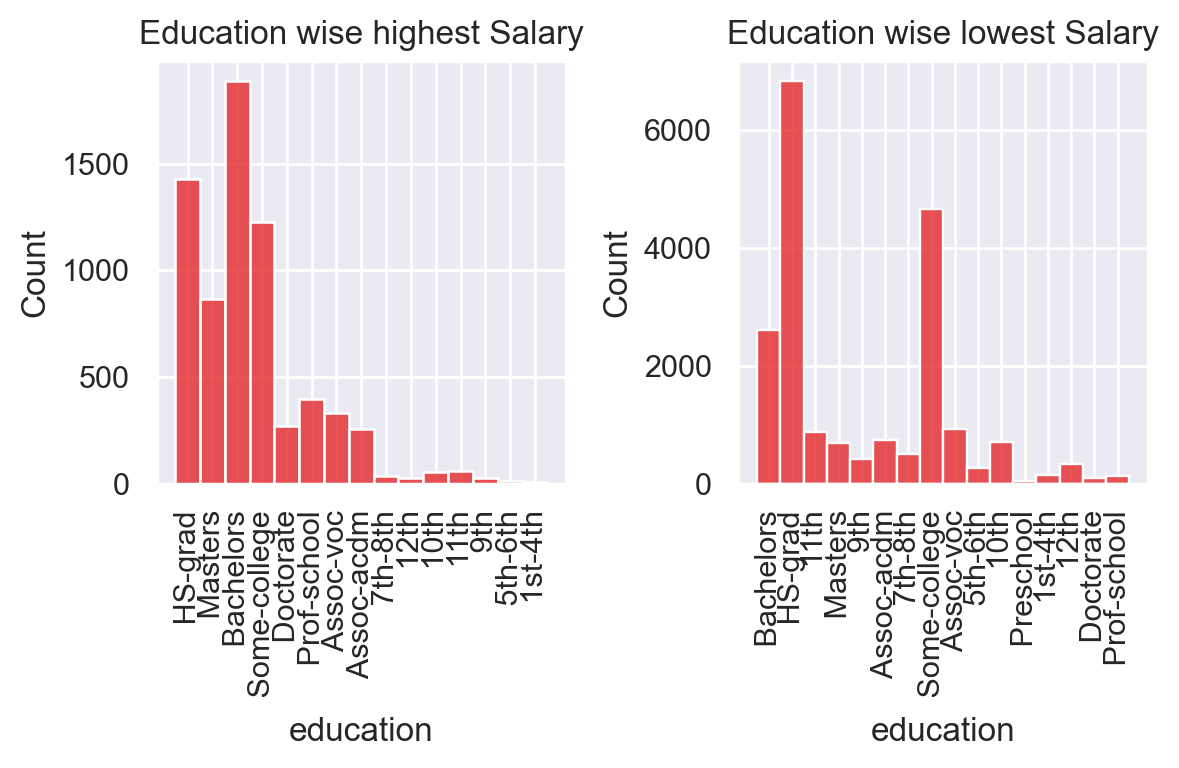

In [47]:
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('Education wise highest Salary')

plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('Education wise lowest Salary')
plt.tight_layout()

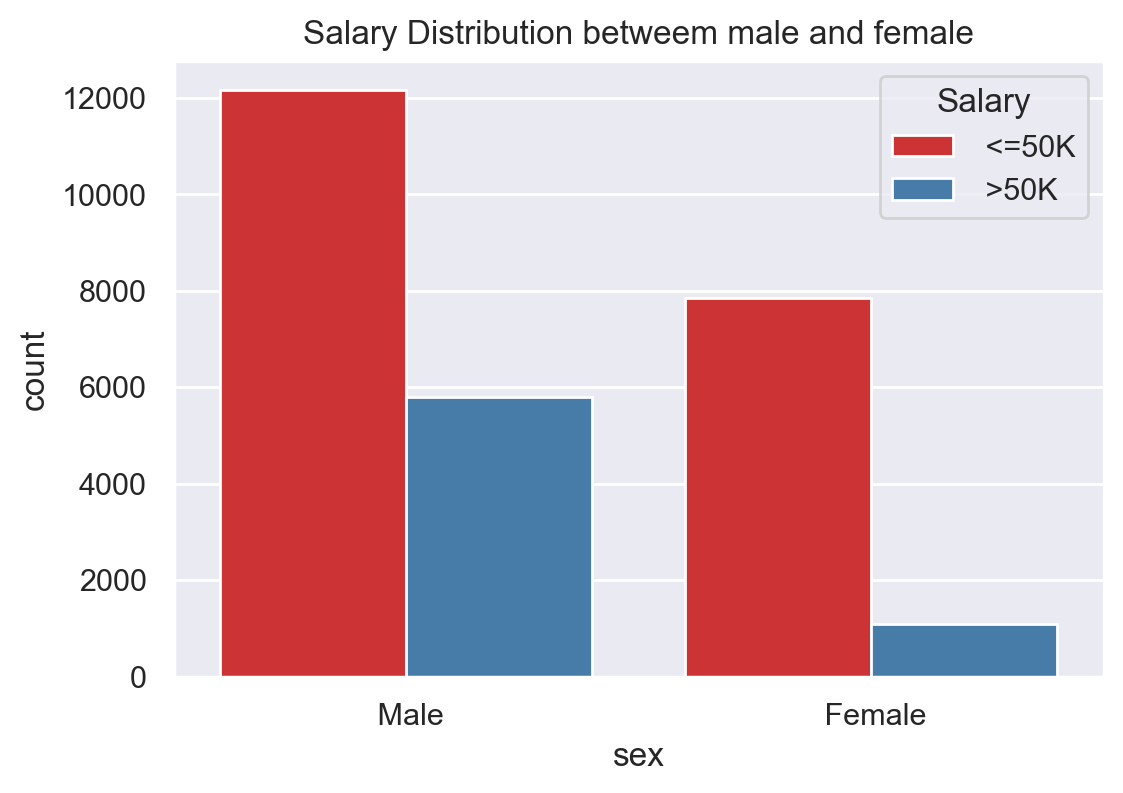

In [36]:
sns.countplot(data = df, x = 'sex', hue = 'Salary')
plt.title('Salary Distribution betweem male and female')
plt.show()

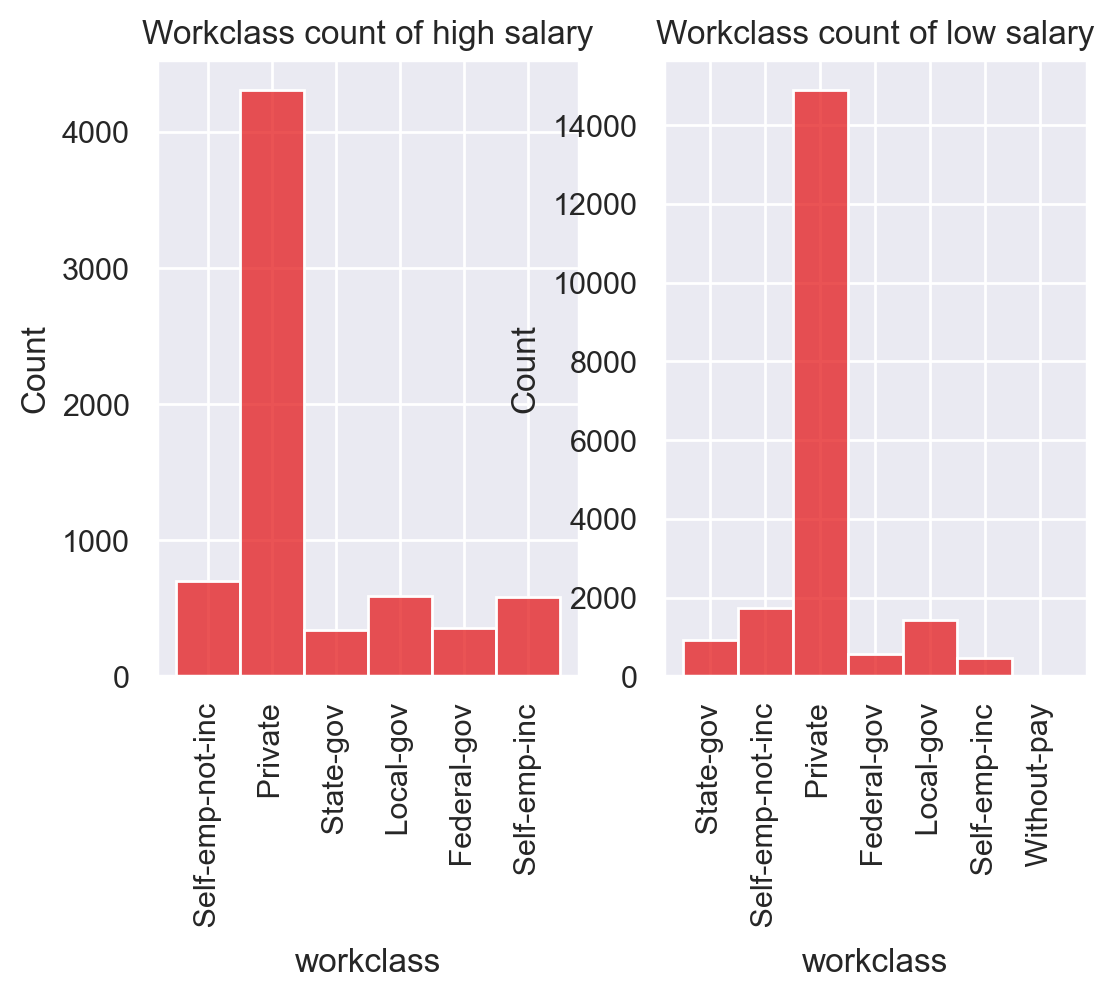

<Figure size 1200x800 with 0 Axes>

In [49]:
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('Workclass count of high salary')
plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('Workclass count of low salary')
plt.show()
plt.tight_layout()

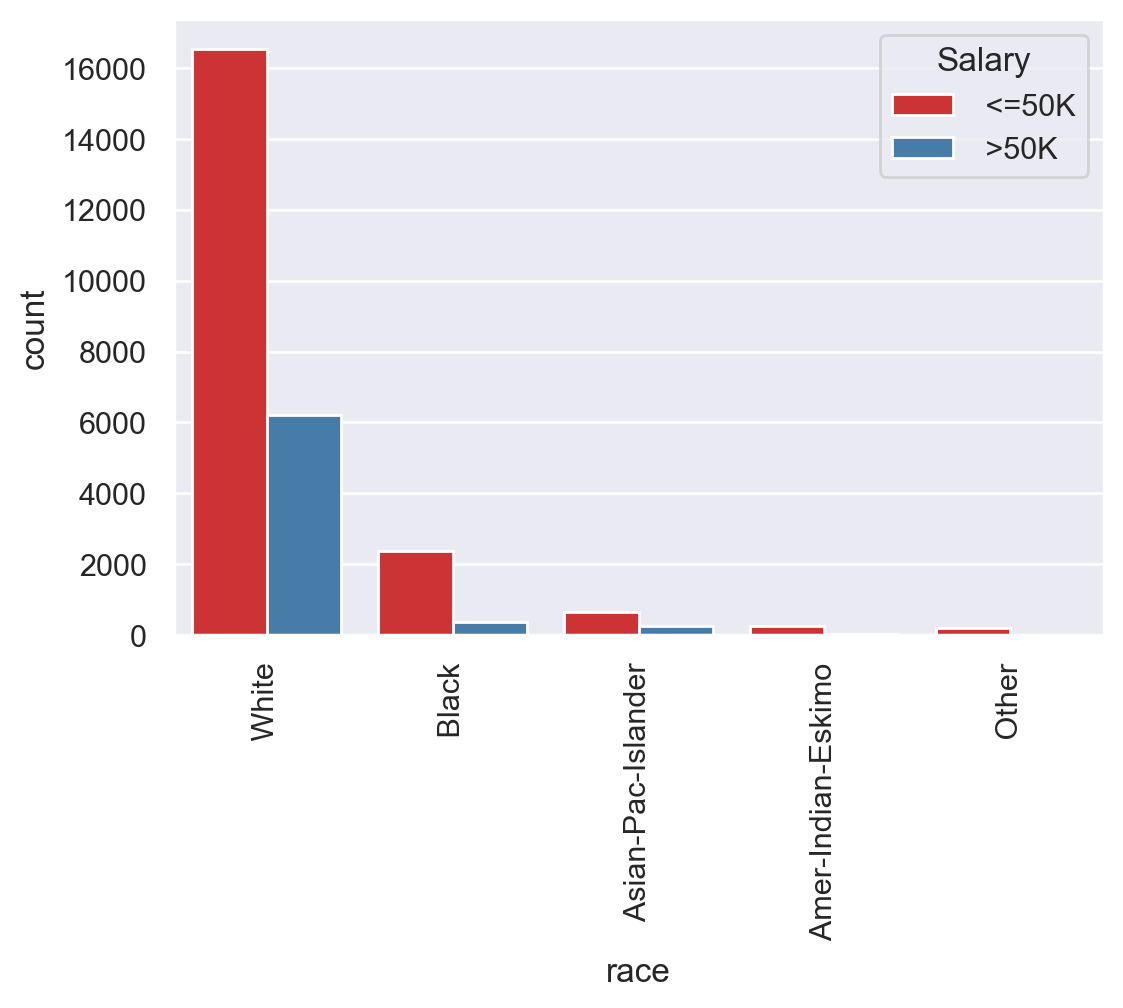

In [50]:
sns.countplot(data = df, x = 'race', hue = "Salary")
plt.xticks(rotation = 90)
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [54]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = lb.fit_transform(df[col])

In [55]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,5,9,13,4,0,1,4,1,0,0,40.0,37,0
1,50.0,4,9,13,2,3,0,4,1,0,0,32.5,37,0
2,38.0,2,11,9,0,5,1,4,1,0,0,40.0,37,0
3,53.0,2,1,7,2,5,0,2,1,0,0,40.0,37,0
4,28.0,2,9,13,2,9,5,2,0,0,0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53.0,2,12,14,2,3,0,4,1,0,0,40.0,37,1
30155,22.0,2,15,10,4,10,1,4,1,0,0,40.0,37,0
30156,27.0,2,7,12,2,12,5,4,0,0,0,38.0,37,0
30158,58.0,2,11,9,6,0,4,4,0,0,0,40.0,37,0


<Axes: >

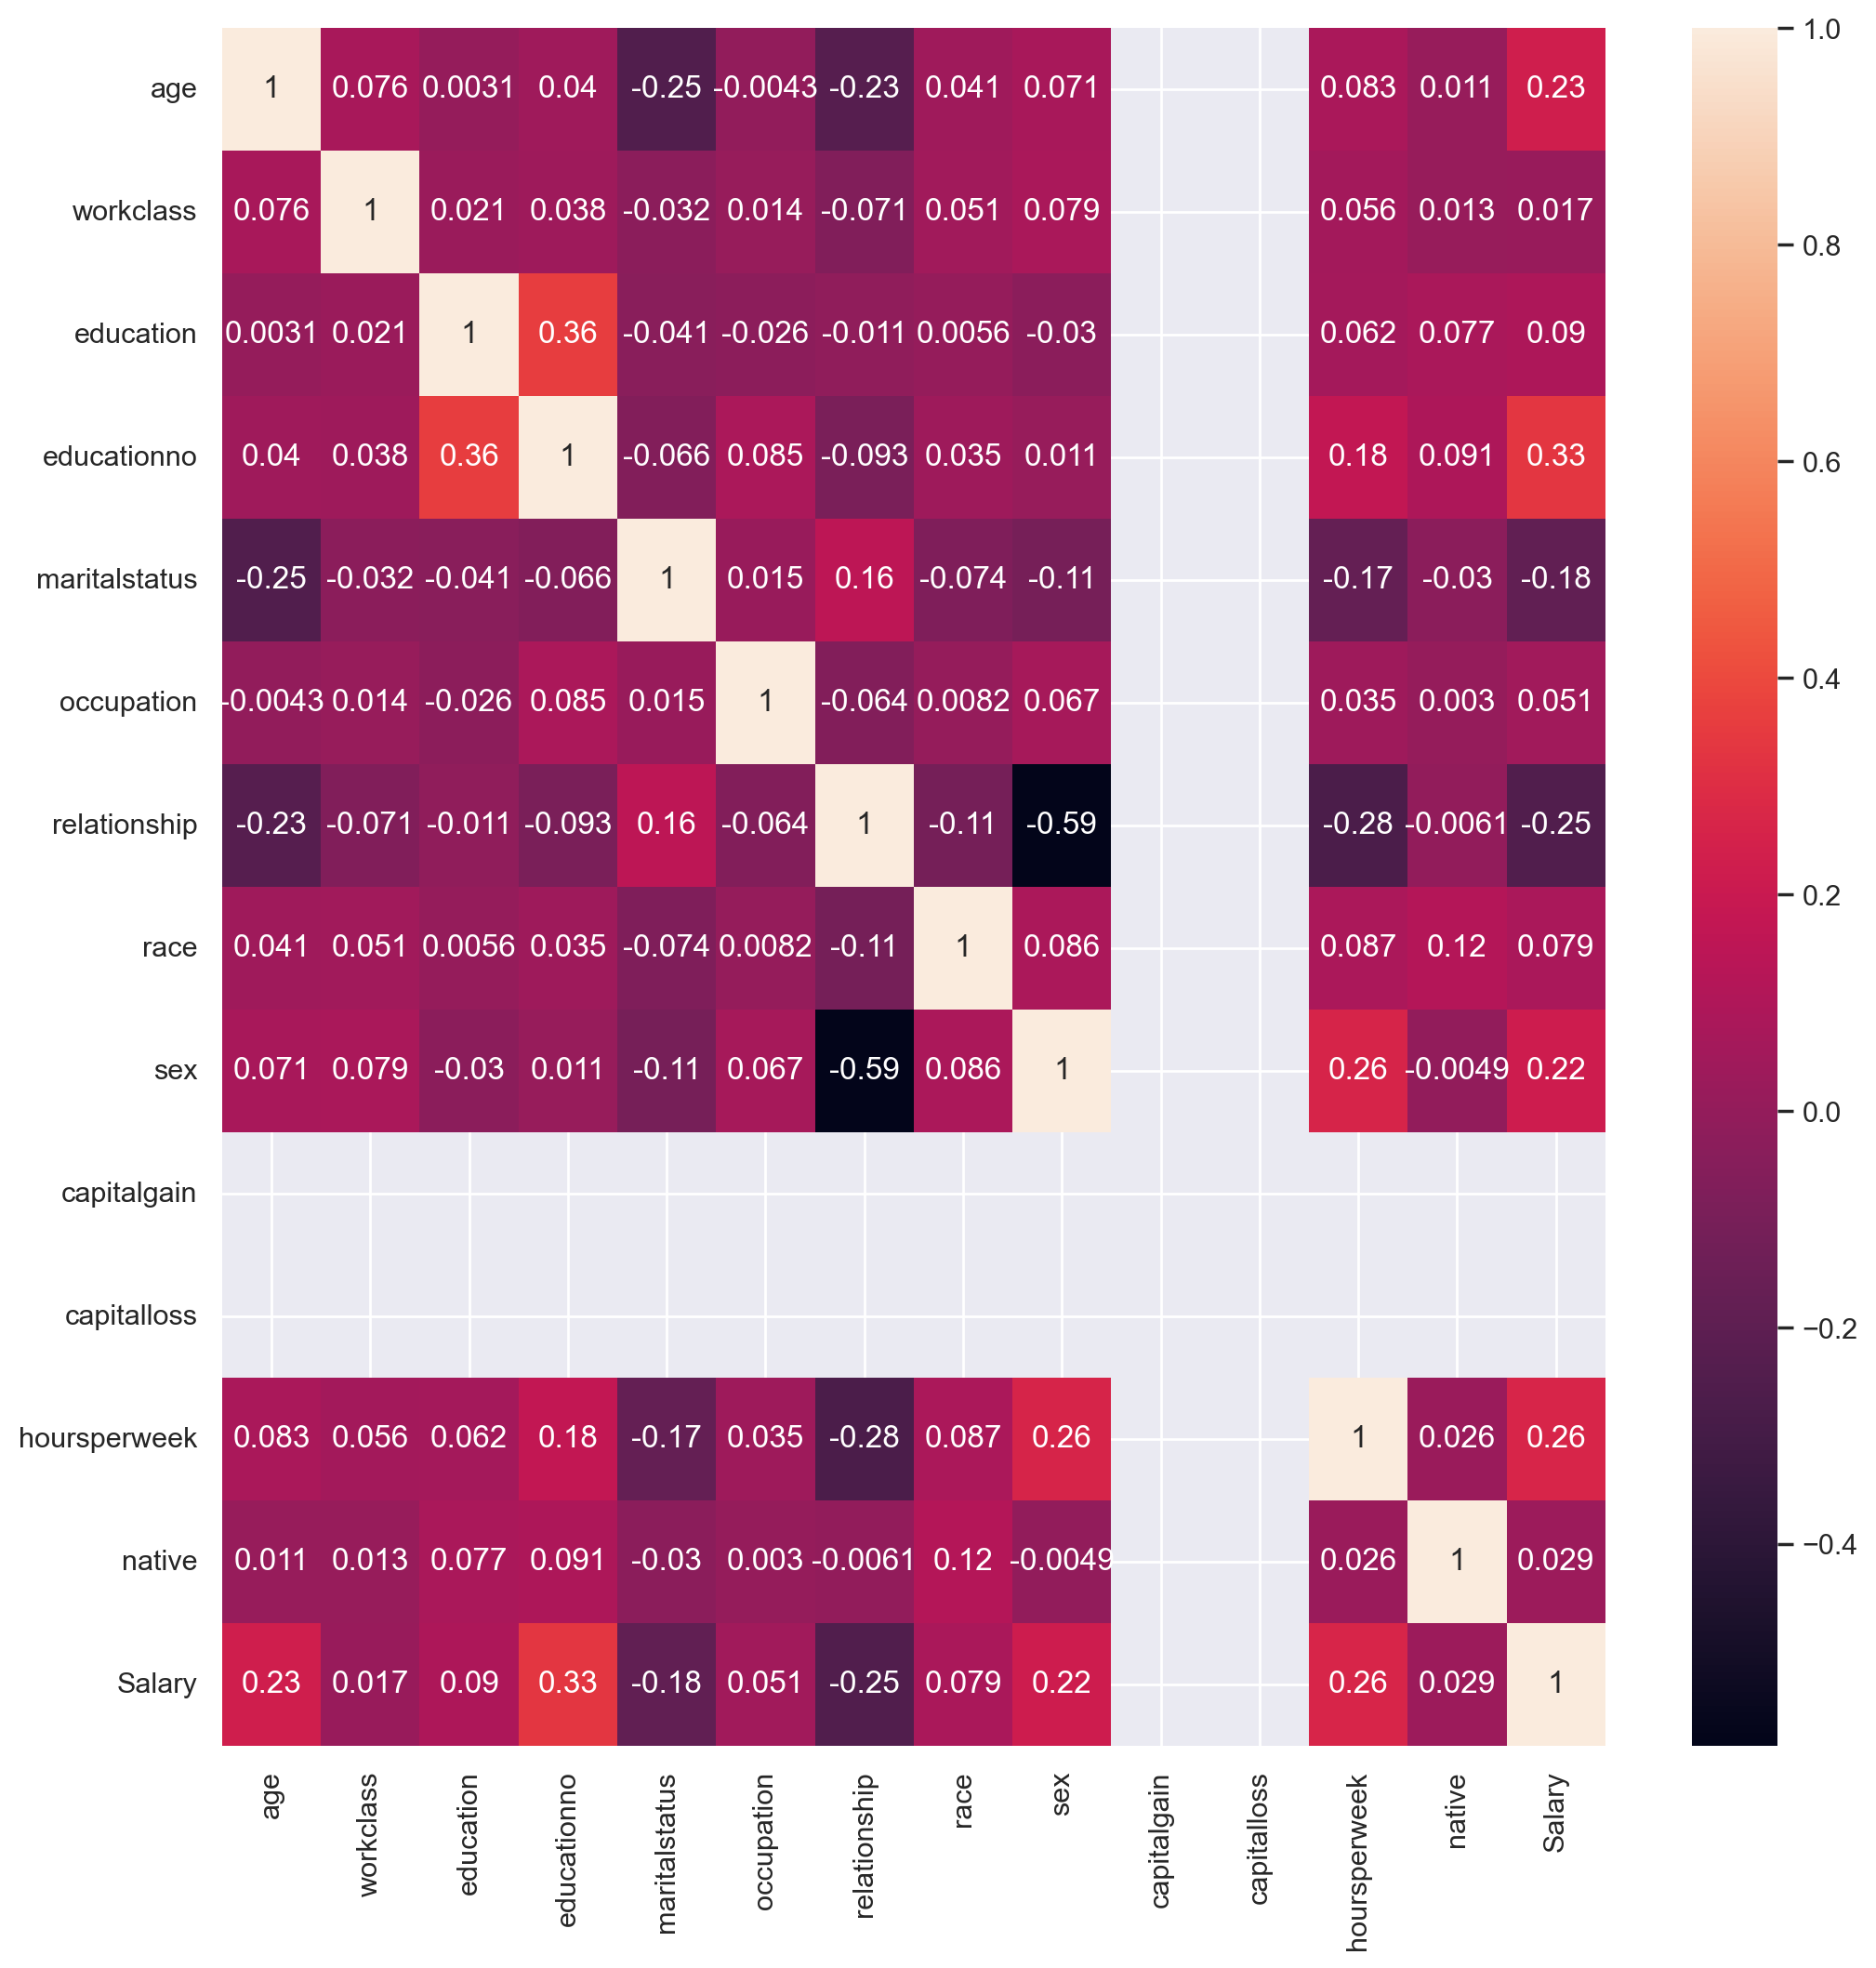

In [58]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True)

In [59]:
df.drop(['capitalgain','capitalloss'], axis = 1, inplace = True)

In [60]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39.0,5,9,13,4,0,1,4,1,40.0,37,0
1,50.0,4,9,13,2,3,0,4,1,32.5,37,0
2,38.0,2,11,9,0,5,1,4,1,40.0,37,0
3,53.0,2,1,7,2,5,0,2,1,40.0,37,0
4,28.0,2,9,13,2,9,5,2,0,40.0,4,0


In [62]:
df_test = pd.read_csv('SalaryData_Test(1).csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [66]:
df_test.drop(['capitalgain','capitalloss'], axis = 1, inplace = True)

In [69]:
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = lb.fit_transform(df_test[col])

In [71]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39.0,5,9,13,4,0,1,4,1,40.0,37,0
1,50.0,4,9,13,2,3,0,4,1,32.5,37,0
2,38.0,2,11,9,0,5,1,4,1,40.0,37,0
3,53.0,2,1,7,2,5,0,2,1,40.0,37,0
4,28.0,2,9,13,2,9,5,2,0,40.0,4,0


In [72]:
xtrain = df.drop(columns = ['Salary'])
ytrain = df['Salary']

xtest = df_test.drop(columns = ['Salary'])
ytest = df_test['Salary']

In [73]:
sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [74]:
svc = SVC()
model = svc.fit(xtrain,ytrain)

In [75]:
ypred = model.predict(xtest)

In [77]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11360
           1       0.69      0.51      0.58      3700

    accuracy                           0.82     15060
   macro avg       0.77      0.72      0.74     15060
weighted avg       0.81      0.82      0.81     15060



In [78]:
model.score(xtrain,ytrain)

0.8256699996282942

In [79]:
model.score(xtest, ytest)

0.8233067729083665